In [40]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from scipy import stats


def get_ohlcv_yf(code,start="2021-01-01",end="2024-12-31", interval="1d"): #interval = [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
    ohlcv = yf.download(code,start=start,end=end, interval=interval)
    ohlcv.columns = ohlcv.columns.droplevel(1)
    ohlcv["Return"] = (ohlcv["Close"] - ohlcv["Open"]) / ohlcv["Open"]
    return ohlcv

def plot_ohclv(ohlcv):
    fig = plt.figure(figsize=(15,6))

    for i, feature in enumerate(["Close","High","Low","Open","Volume","Return"]):
        ax = plt.subplot(3,2,i+1)
        ax.set_title(feature)
        ohlcv[feature].tail(500).plot(ax=ax)
    plt.tight_layout()




In [53]:
df_7974T = get_ohlcv_yf("7974.T", interval="1wk")
df_7974T

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return
Date,,,,,,
2020-12-28,5823.079102,5823.079102,5823.079102,5823.079102,0,0.000000
2021-01-04,5782.388672,5957.532156,5635.551205,5836.347018,52980000,-0.009245
2021-01-11,5810.694336,5890.305006,5719.584347,5782.388320,39072000,0.004895
2021-01-18,5654.127441,5896.497735,5434.755788,5780.619967,55078000,-0.021882
2021-01-25,5358.683105,5637.320474,5333.915339,5629.359406,53869000,-0.048083
...,...,...,...,...,...,...
2024-12-02,9058.000000,9370.000000,8742.000000,8900.000000,29218300,0.017753
2024-12-09,9124.000000,9234.000000,8960.000000,9156.000000,20464000,-0.003495
2024-12-16,9131.000000,9587.000000,9102.000000,9175.000000,28037900,-0.004796


In [54]:
df_7974T.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
Return    0
dtype: int64

In [55]:
df_7974T.describe()

Price,Close,High,Low,Open,Volume,Return
count,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000
mean,6211.361226,6353.715245,6051.474178,6195.137740,2.854121e+07,0.002556
std,1270.365373,1291.929782,1232.117545,1248.977778,1.396361e+07,0.031976
min,4482.542480,4592.807129,4381.464809,4449.167247,0.000000e+00,-0.086772
25%,5351.128662,5456.423393,5228.393921,5324.147402,1.827035e+07,-0.018025
50%,5782.623047,5897.123339,5637.502848,5781.504144,2.493600e+07,0.001902
75%,7179.336914,7239.123885,6774.304970,7024.234199,3.500950e+07,0.023548
max,9350.000000,9587.000000,9257.000000,9430.000000,8.601700e+07,0.124879


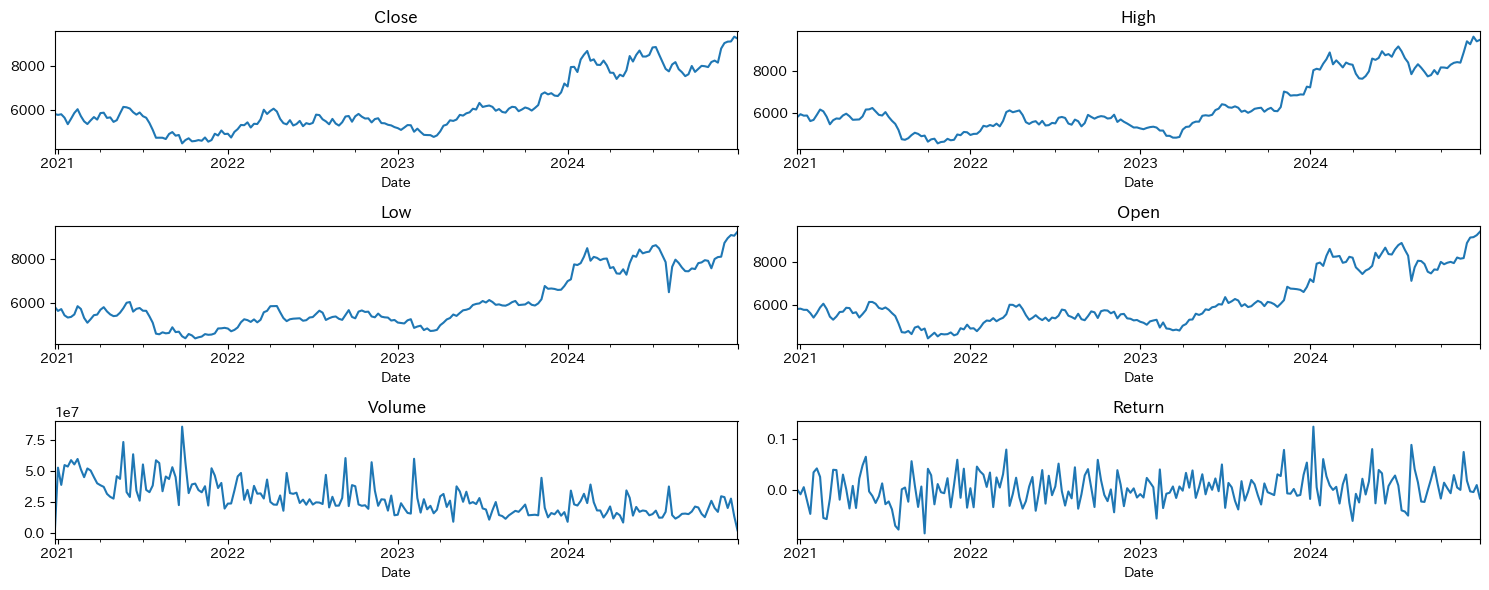

In [56]:
plot_ohclv(df_7974T)

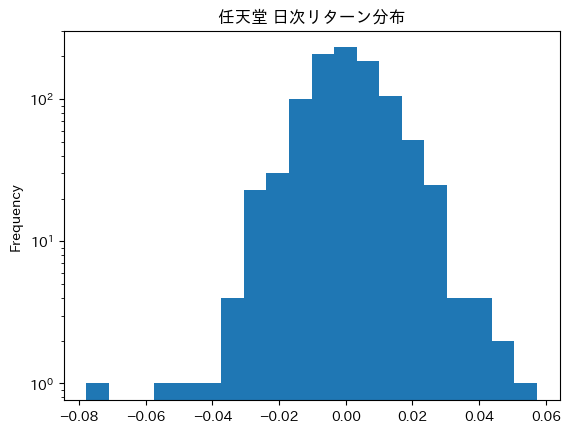

In [ ]:
plt.title("任天堂 日次リターン分布")
df_7974T["Return"].plot(kind="hist",bins=20)
plt.yscale("log")

In [102]:
import numpy as np
strategy1 = merged_df.copy()
strategy1["retSP500_sign"] = np.sign(strategy1["retSP500"])
strategy1["retSP500_sign_s1"] = strategy1["retSP500_sign"].shift(1)

MultiIndex([(           'Close', '7974.T'),
            (            'High', '7974.T'),
            (             'Low', '7974.T'),
            (            'Open', '7974.T'),
            (          'Volume', '7974.T'),
            (             'ret',       ''),
            (           'Close',  '^GSPC'),
            (            'High',  '^GSPC'),
            (             'Low',  '^GSPC'),
            (            'Open',  '^GSPC'),
            (          'Volume',  '^GSPC'),
            (        'retSP500',       ''),
            (   'retSP500_sign',       ''),
            ('retSP500_sign_s1',       '')],
           names=['Price', 'Ticker'])

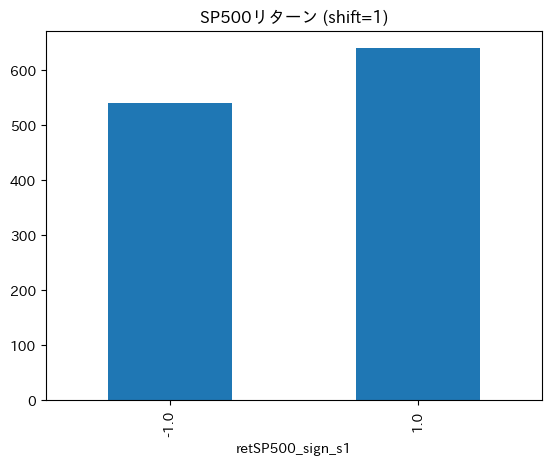

In [104]:
plt.title("SP500リターン (shift=1)")
strategy1.groupby("retSP500_sign_s1").size().plot(kind="bar")
strategy1.columns

In [81]:
# ret_a = strategy1.query("`('ret_sign_sum7_s1', '')` <= -3")["ret"]
# ret_b = strategy1.query("`('ret_sign_sum7_s1', '')` > -3 and `('ret_sign_sum7_s1', '')` < 3")["ret"]
# ret_c = strategy1.query("`('ret_sign_sum7_s1', '')` >= 3")["ret"]

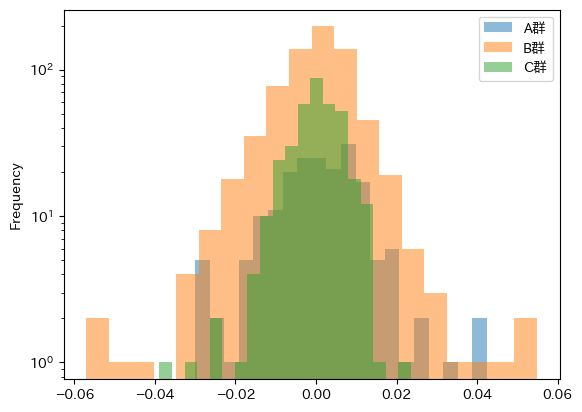

In [83]:
# kwargs = {'kind': 'hist', 'bins': 20, 'alpha': 0.5}
# ret_a.plot(label='A群', **kwargs)
# ret_b.plot(label='B群', **kwargs)
# ret_c.plot(label='C群', **kwargs)
# plt.yscale('log')
# plt.legend()

In [84]:
# from scipy import stats
# # MW検定
# print('MW検定のp値')
# u_stat, p_value = stats.mannwhitneyu(ret_a, ret_b)
# print(f'A群とB群: {p_value:.4f}')
# u_stat, p_value = stats.mannwhitneyu(ret_b, ret_c)
# print(f'B群とC群: {p_value:.4f}')
# u_stat, p_value = stats.mannwhitneyu(ret_a, ret_c)
# print(f'A群とC群: {p_value:.4f}')

MW検定のp値
A群とB群: 0.2395
B群とC群: 0.5849
A群とC群: 0.1370


In [105]:
strategy1["signal"] = 0
strategy1.loc[strategy1["retSP500_sign_s1"] == 1, "signal"] = 1
strategy1.loc[strategy1["retSP500_sign_s1"] == -1, "signal"] = -1

In [109]:
strategy1

Price,Close,High,Low,Open,Volume,ret,Close,High,Low,Open,Volume,retSP500,retSP500_sign,retSP500_sign_s1,signal
Ticker,7974.T,7974.T,7974.T,7974.T,7974.T,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,,,,,,,
2020-01-06,3653.967773,3683.890298,3634.304400,3677.050864,11546000,-0.006278,3246.280029,3246.840088,3214.639893,3217.550049,3.702460e+09,0.008929,1.0,NaN,0
2020-01-07,3671.065918,3718.941952,3666.791272,3679.615210,11676000,-0.002323,3237.179932,3244.909912,3232.429932,3241.860107,3.435910e+09,-0.001444,-1.0,1.0,1
2020-01-08,3645.418213,3662.516797,3557.360503,3633.449204,14844000,0.003294,3253.050049,3267.070068,3236.669922,3238.590088,3.726840e+09,0.004465,1.0,-1.0,-1
2020-01-09,3708.682861,3727.491304,3689.874419,3723.216658,10308000,-0.003904,3274.699951,3275.580078,3263.669922,3266.030029,3.641230e+09,0.002655,1.0,1.0,1
2020-01-10,3713.812744,3742.880339,3688.164866,3695.004300,8263000,0.005090,3265.350098,3282.989990,3260.860107,3281.810059,3.214580e+09,-0.005016,-1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,9228.000000,9308.000000,9165.000000,9276.000000,2319000,-0.005175,6040.040039,6040.100098,5981.439941,5984.629883,1.757720e+09,0.009259,1.0,1.0,1
2024-12-25,9200.000000,9210.000000,9072.000000,9200.000000,2559200,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


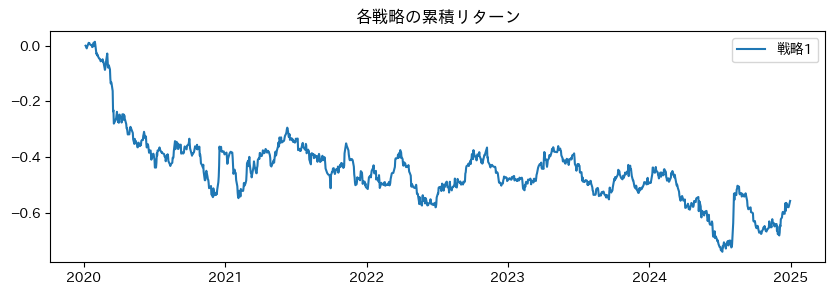

In [108]:
fig = plt.figure(figsize=(10,3))
plt.title("各戦略の累積リターン")
plt.plot((strategy1["signal"]*strategy1["ret"]).cumsum(),label="戦略1")
plt.legend()

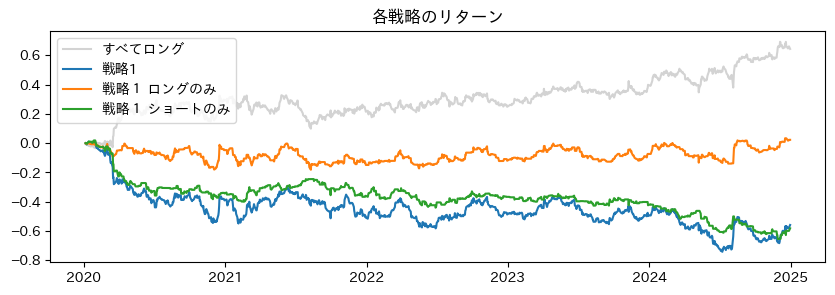

In [107]:
fig = plt.figure(figsize=(10,3))
plt.title("各戦略のリターン")
plt.plot(strategy1["ret"].cumsum(),label="すべてロング",c="lightgray")
plt.plot((strategy1["signal"]*strategy1["ret"]).cumsum(),label="戦略1")
plt.plot((strategy1["signal"].replace(-1,0)*strategy1["ret"]).cumsum(),label="戦略１ ロングのみ")
plt.plot((strategy1["signal"].replace(1,0)*strategy1["ret"]).cumsum(),label="戦略１ ショートのみ")
plt.legend()